In [354]:
import numpy as np

In [355]:
x=np.array([10, 2])

w1=np.array([[1, 2, -1], [-3, -2, 0]])
w2=np.array([4, 2, -4])




## Forward Propagation

In [356]:
z2=x@w1

z2

array([  4,  16, -10])

In [357]:
def relu(x):
    return np.maximum(0, x)

a2=relu(z2)
a2

array([ 4, 16,  0])

In [358]:
z3=a2@w2
z3

48

In [359]:
y_hat=relu(z3)
y_hat

48

In [360]:
z2=x@w1
a2=relu(z2)
z3=a2@w2
y_hat=relu(z3)

y_hat=relu(relu(x@w1)@w2)
y_hat


48

## Backpropagation

In [361]:
import torch

x=torch.tensor([3.0, 5.0])
y=torch.tensor(81.0)

w1=torch.tensor([[4.0, -2.0, 0.0], [1.0, -1.0, 2.0]], requires_grad=True)
w2=torch.tensor([1.0, 2.0, 1.0], requires_grad=True)

def relu(x):
    return torch.max(torch.tensor(0.0), x)




In [362]:
# Forward Propagation
z2=x@w1
a2=relu(z2)
z3=a2@w2
y_hat=relu(z3)


In [363]:
loss=(y-y_hat)**2
loss

tensor(2916., grad_fn=<PowBackward0>)

In [364]:
w1.grad

In [365]:
loss.backward()   # berechne die Ableitungen von w1 und w2

In [366]:
w1.grad

tensor([[-324.,    0., -324.],
        [-540.,    0., -540.]])

In [367]:
w2.grad

tensor([-1836.,    -0., -1080.])

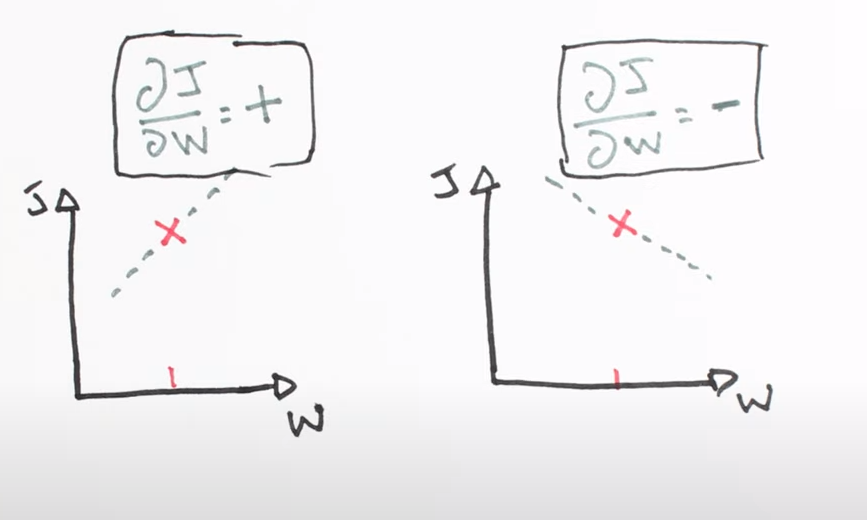

In [368]:
# Berechnung der neuen Gewichte für w1

w1-(w1.grad*0.001)

tensor([[ 4.3240, -2.0000,  0.3240],
        [ 1.5400, -1.0000,  2.5400]], grad_fn=<SubBackward0>)

In [369]:
w2-(w2.grad*0.001)

tensor([2.8360, 2.0000, 2.0800], grad_fn=<SubBackward0>)

### Schleife

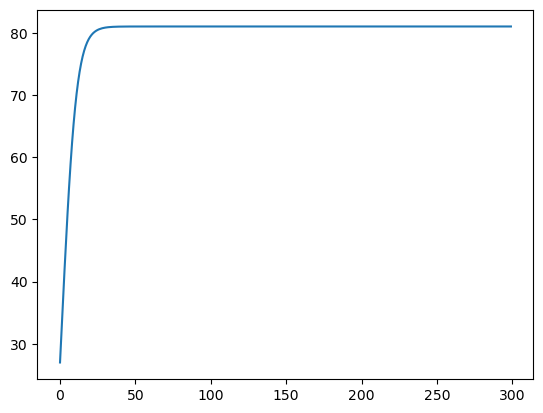

In [370]:
lr=0.0001
epochs=300

x=torch.tensor([3.0, 5.0])
y=81.0

w1=torch.tensor([[4.0, -2.0, 0.0], [1.0, -1.0, 2.0]], requires_grad=True)
w2=torch.tensor([1.0, 2.0, 1.0], requires_grad=True)


y_hat_hist=[]

for i in range(epochs):
    y_hat=relu(relu(x@w1)@w2)       # Forward Propagation
    y_hat_hist.append(y_hat.item()) # Speichere den Wert von y_hat
    loss=(y-y_hat)**2          # Berechnung des Fehlers (loss)

    # Ab hier Backpropagation
    loss.backward()         # Ableiten berechnen
    with torch.no_grad():   # das hier bitte nicht ableiten
        w1.sub_(w1.grad*lr)  # Verändere die Gewichte von w1 in die richtige Richtung
        w2.sub_(w2.grad*lr)  # same
        w1.grad.zero_()      # setze die Ableitung von w1 auf 0
        w2.grad.zero_()      # same


# Plotte die Entwicklung von y_hat
import matplotlib.pyplot as plt
plt.plot(y_hat_hist)
plt.show()



## mehrere Trainingsdaten




In [371]:
x=torch.tensor([[3.0, 5.0], 
                [5.0, 1.0], 
                [10.0, 2.0]])
y=torch.tensor([75, 82, 93])

# 5 Neuronen auf dem Hiddenlayer

# create random weights
w1=torch.randn(2, 5, requires_grad=True)
w2=torch.randn(5, 1, requires_grad=True)
y_hat=relu(relu(x@w1)@w2)
loss=((y-y_hat)**2).mean()


/var/folders/yl/qjs6b9wn4zx7nh630c4my9lw0000gn/T/ipykernel_47164/1471360820.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y)


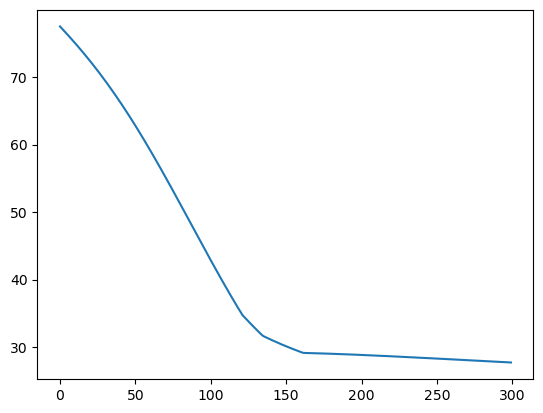

In [372]:
hist=[]
w1=torch.randn(2, 5, requires_grad=True)
w2=torch.randn(5, 1, requires_grad=True)
lr=0.00001
epochs=300
y=torch.tensor(y)

for i in range(epochs):
    y_hat=relu(relu(x@w1)@w2)       # Forward Propagation
    loss=((y-y_hat)**2).mean()          # Berechnung des Fehlers (loss)
    hist.append((abs(y_hat-y).mean()).item())  # Mittlere absolute Abweichung

    # Ab hier Backpropagation
    loss.backward()         # Ableiten berechnen
    with torch.no_grad():   # das hier bitte nicht ableiten
        w1.sub_(w1.grad*lr)  # Verändere die Gewichte von w1 in die richtige Richtung
        w2.sub_(w2.grad*lr)  # same
        w1.grad.zero_()      # setze die Ableitung von w1 auf 0
        w2.grad.zero_()      # same

# Plotte die Entwicklung von y_hat
import matplotlib.pyplot as plt
plt.plot(hist)
plt.show()

In [373]:
y_hat=relu(relu(x@w1)@w2)
y_hat


tensor([[ 54.9591],
        [ 54.7278],
        [109.4557]], grad_fn=<MaximumBackward0>)

## weight decay

/var/folders/yl/qjs6b9wn4zx7nh630c4my9lw0000gn/T/ipykernel_47164/1771561443.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y)


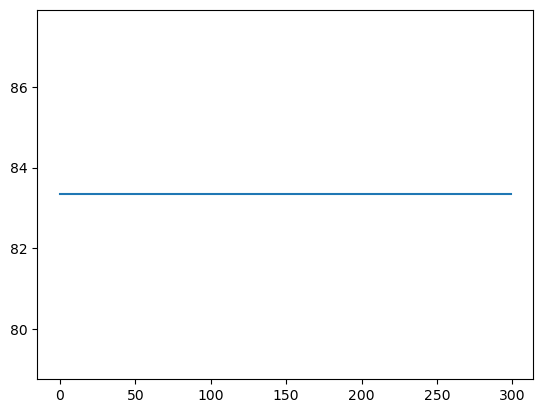

In [374]:
hist=[]
w1=torch.randn(2, 5, requires_grad=True)
w2=torch.randn(5, 1, requires_grad=True)
lr=0.00001
wd=0.0001
epochs=300
y=torch.tensor(y)

for i in range(epochs):
    y_hat=relu(relu(x@w1)@w2)       # Forward Propagation
    loss=((y-y_hat)**2).mean()+(torch.sum(w1)+torch.sum(w2))**2*wd          # Berechnung des Fehlers (loss)
    hist.append((abs(y_hat-y).mean()).item())  # Mittlere absolute Abweichung

    # Ab hier Backpropagation
    loss.backward()         # Ableiten berechnen
    with torch.no_grad():   # das hier bitte nicht ableiten
        w1.sub_(w1.grad*lr)  # Verändere die Gewichte von w1 in die richtige Richtung
        w2.sub_(w2.grad*lr)  # same
        w1.grad.zero_()      # setze die Ableitung von w1 auf 0
        w2.grad.zero_()      # same

# Plotte die Entwicklung von y_hat
import matplotlib.pyplot as plt
plt.plot(hist)
plt.show()

In [375]:
y_hat=relu(relu(x@w1)@w2)
y_hat


tensor([[0.],
        [0.],
        [0.]], grad_fn=<MaximumBackward0>)

# Bias
Unser Netzoutput (y_hat) wird bisher nur multiplikativ berechnet. Wir können aber auch einen Bias addieren. Dieser wird dann auch trainiert.Denn eine normale Mathefunktion hat immer die Form: y = mx + b. Uns bisher fehlt das +b

/var/folders/yl/qjs6b9wn4zx7nh630c4my9lw0000gn/T/ipykernel_47164/989029832.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y)


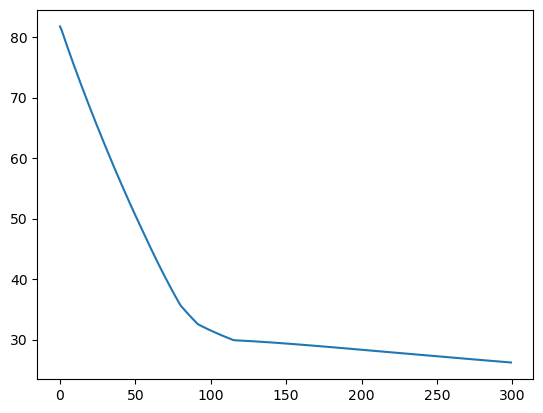

In [376]:
hist=[]
w1=torch.randn(2, 5, requires_grad=True)
w2=torch.randn(5, 1, requires_grad=True)
b1=torch.ones(5, requires_grad=True)


lr=0.00001
wd=0.0001
epochs=300
y=torch.tensor(y)

for i in range(epochs):
     # Forward Propagation
    z2=(x@w1)+b1 
    a2=relu(z2)
    z3=a2@w2
    y_hat=relu(z3)
    loss=((y-y_hat)**2).mean()+(torch.sum(w1)+torch.sum(w2))**2*wd          # Berechnung des Fehlers (loss)
    hist.append((abs(y_hat-y).mean()).item())  # Mittlere absolute Abweichung

    # Ab hier Backpropagation
    loss.backward()         # Ableiten berechnen
    with torch.no_grad():   # das hier bitte nicht ableiten
        w1.sub_(w1.grad*lr)  # Verändere die Gewichte von w1 in die richtige Richtung
        w2.sub_(w2.grad*lr)  # same
        b1.sub_(b1.grad*lr)
        w1.grad.zero_()      # setze die Ableitung von w1 auf 0
        w2.grad.zero_()      # same
        b1.grad.zero_()

# Plotte die Entwicklung von y_hat
import matplotlib.pyplot as plt
plt.plot(hist)
plt.show()

In [377]:
y_hat=relu(relu(x@w1+b1)@w2)
y_hat

tensor([[ 55.9283],
        [ 57.0961],
        [108.2442]], grad_fn=<MaximumBackward0>)